Edgar Osvaldo Navarro García A01644488

# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [2]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

# Importing data

In [3]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
print(dataset.head)
print(dataset.shape)
print(dataset.columns)

<bound method NDFrame.head of      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>
(150, 5)
Index(['Sepal_Length', 'Sepal_Width', 'Petal_Len

2. Drop rows with any missing values


In [5]:
print(dataset.isnull().sum())
dataset = dataset.dropna()
dataset.shape

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Flower          0
dtype: int64


(150, 5)

3. Encoding the class label categorical column: from string to num


In [6]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}

print(dataset.dtypes)
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})
print(dataset.dtypes)
print(dataset.head())
#Visualize the dataset


Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Flower           object
dtype: object
Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Flower            int64
dtype: object
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


C:\Users\ngedg\AppData\Local\Temp\ipykernel_16148\2535895337.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})


Now the label/category is numeric


4. Discard columns that won't be used


In [7]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

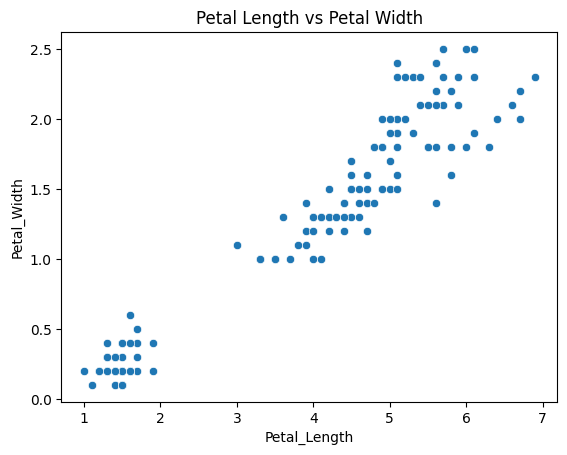

In [8]:
sns.scatterplot(x = dataset.Petal_Length,y = dataset.Petal_Width)
plt.title("Petal Length vs Petal Width")
plt.show()

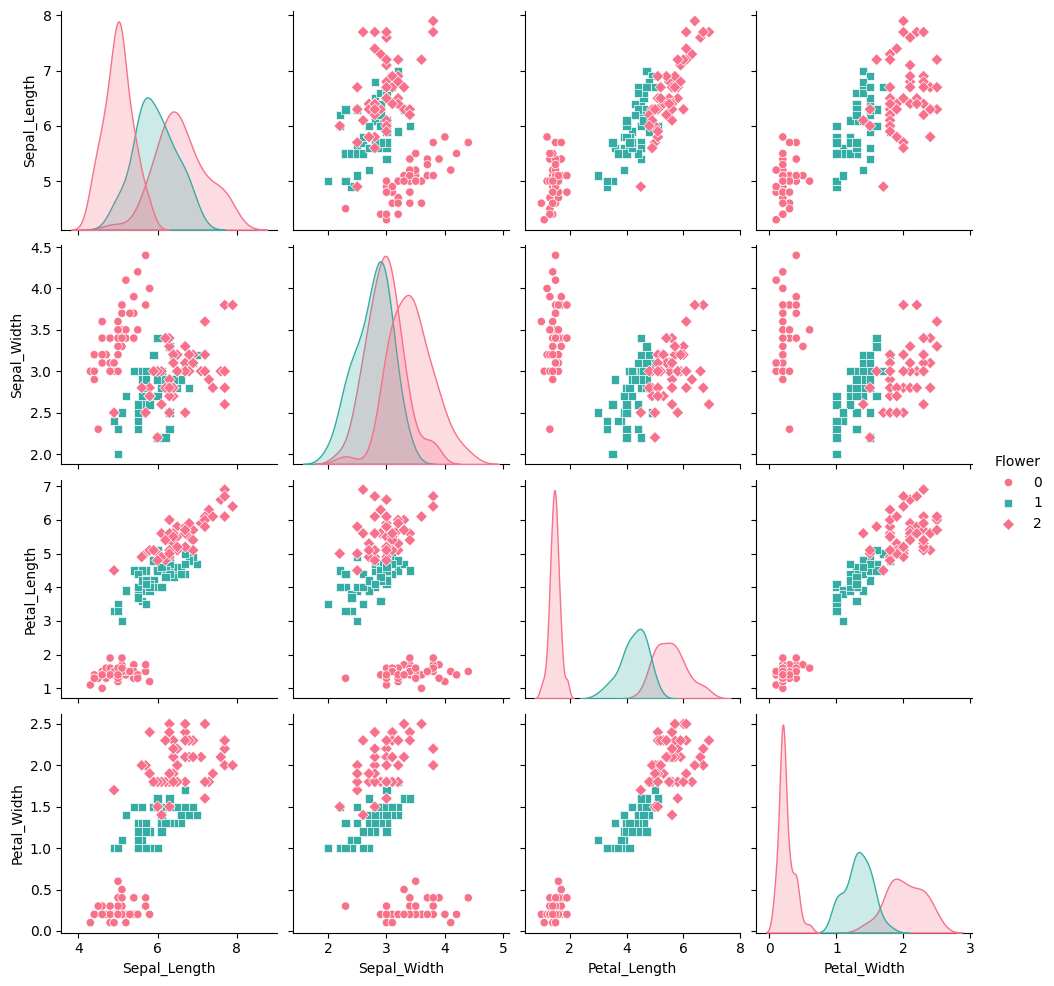

In [9]:
# Pairplot: Scatterplot of all variables
sns.pairplot(dataset, hue="Flower", palette="husl", diag_kind="kde", markers=["o", "s", "D"])
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

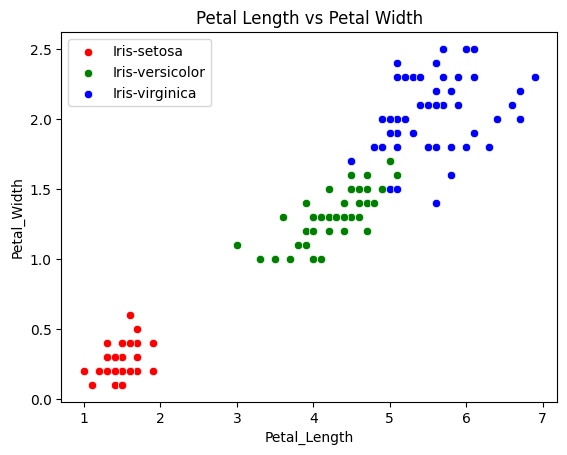

In [10]:
# Get dataframes for each real cluster
dataset0 = dataset[dataset.Flower == 0]
dataset1 = dataset[dataset.Flower == 1]
dataset2 = dataset[dataset.Flower == 2]

sns.scatterplot(x = dataset0.Petal_Length, y = dataset0.Petal_Width, color = "red", label = "Iris-setosa")
sns.scatterplot(x = dataset1.Petal_Length, y = dataset1.Petal_Width, color = "green", label = "Iris-versicolor")
sns.scatterplot(x = dataset2.Petal_Length, y = dataset2.Petal_Width, color = "blue", label = "Iris-virginica")

plt.legend()
plt.title("Petal Length vs Petal Width")
plt.show()



Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [11]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
num_clust = 3


X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
y  = dataset["Flower"].values

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeanclust = KMeans(n_clusters=num_clust, random_state=0, n_init="auto")
clusters = kmeanclust.fit_predict(X)
# Print estimated cluster of each point in the dataset

print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [12]:
# Print real cluster of each observations in the dataset
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [13]:
# Cambiar los valores de los clusters para que coincidan con los valores reales
clusters = np.choose(clusters, [1, 0, 2]).astype(int)
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [14]:
# Add a new column to the dataset with the cluster information
dataset["Cluster"] = clusters

In [15]:
# Label of the estimated clusters
dataset.Cluster = dataset.Cluster.replace({0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"})
print(dataset)


     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower  \
0             5.1          3.5           1.4          0.2       0   
1             4.9          3.0           1.4          0.2       0   
2             4.7          3.2           1.3          0.2       0   
3             4.6          3.1           1.5          0.2       0   
4             5.0          3.6           1.4          0.2       0   
..            ...          ...           ...          ...     ...   
145           6.7          3.0           5.2          2.3       2   
146           6.3          2.5           5.0          1.9       2   
147           6.5          3.0           5.2          2.0       2   
148           6.2          3.4           5.4          2.3       2   
149           5.9          3.0           5.1          1.8       2   

             Cluster  
0        Iris-setosa  
1        Iris-setosa  
2        Iris-setosa  
3        Iris-setosa  
4        Iris-setosa  
..               ...  
145   Iris

In [ ]:
# Cluster centroides
kmeanclust.cluster_centers_


array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [17]:
# Sum of squared error (sse) of the final model
kmeanclust.inertia_

78.9450658259773

In [18]:
# The number of iterations required to converge
kmeanclust.n_iter_


7

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

Text(0.5, 1.0, 'Petal Length vs Petal Width')

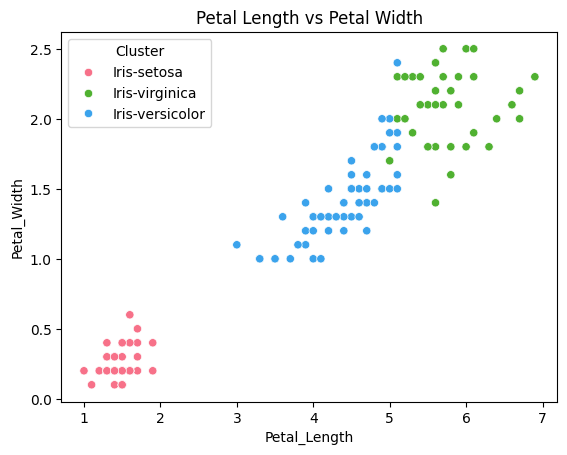

In [19]:
sns.scatterplot(x = dataset.Petal_Length, y = dataset.Petal_Width, hue = dataset.Cluster, palette="husl")
plt.title("Petal Length vs Petal Width")

## Plot both real and estimated clusters to check for errors

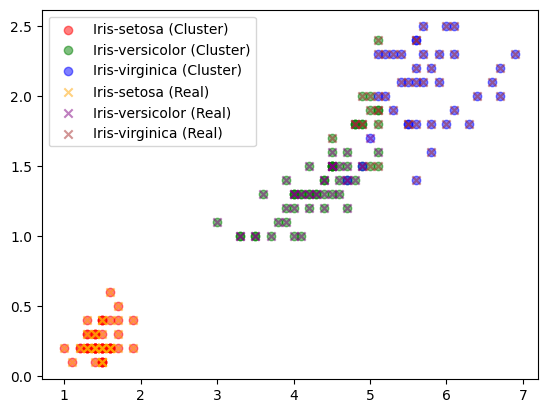

In [32]:
dataframecluster0 = dataset[dataset.Cluster == "Iris-setosa"]
dataframecluster1 = dataset[dataset.Cluster == "Iris-versicolor"]
dataframecluster2 = dataset[dataset.Cluster == "Iris-virginica"]

dataframeflower0 = dataset[dataset.Flower == 0]
dataframeflower1 = dataset[dataset.Flower == 1]
dataframeflower2 = dataset[dataset.Flower == 2]

plt.scatter(dataframecluster0.Petal_Length, dataframecluster0.Petal_Width, color = "red", label = "Iris-setosa (Cluster)" , marker= "o", alpha= 0.5)
plt.scatter(dataframecluster1.Petal_Length, dataframecluster1.Petal_Width, color = "green", label = "Iris-versicolor (Cluster)", marker= "o", alpha= 0.5)
plt.scatter(dataframecluster2.Petal_Length, dataframecluster2.Petal_Width, color = "blue", label = "Iris-virginica (Cluster)", marker= "o", alpha= 0.5)

plt.scatter(dataframeflower0.Petal_Length, dataframeflower0.Petal_Width, color = "orange", label = "Iris-setosa (Real)", marker = "x" , alpha= 0.5)
plt.scatter(dataframeflower1.Petal_Length, dataframeflower1.Petal_Width, color = "purple", label = "Iris-versicolor (Real)" , marker = "x" , alpha= 0.5)
plt.scatter(dataframeflower2.Petal_Length, dataframeflower2.Petal_Width, color = "brown", label = "Iris-virginica (Real)", marker = "x" , alpha= 0.5)

plt.legend()
plt.show()



<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [21]:
# Intialize a list to hold sum of squared error (sse)
errorlist = []


# Define values of k
k_values = range(1, 10)

# For each k

for i in k_values:
    # Initialize KMeans model
    kmeanclust = KMeans(n_clusters=i, random_state=0, n_init="auto")
    # Fit the model
    kmeanclust.fit(X)
    # Append the sse value to the error list
    errorlist.append(kmeanclust.inertia_)



Text(0.5, 1.0, 'Elbow plot')

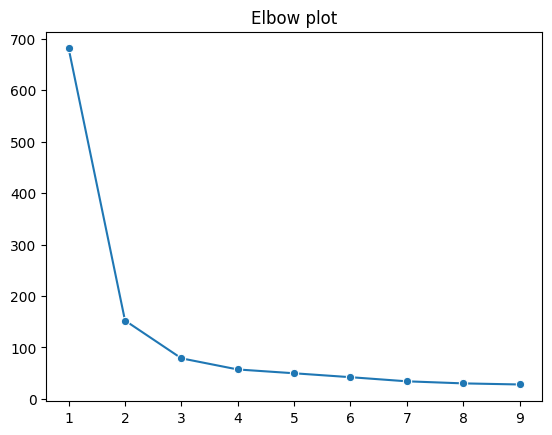

In [23]:
# Plot sse versus k
sns.lineplot(x = k_values, y = errorlist, marker="o")
plt.title("Elbow plot")


Choose the k after which the sse is minimally reduced
3 o 4


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
78.9450658259773


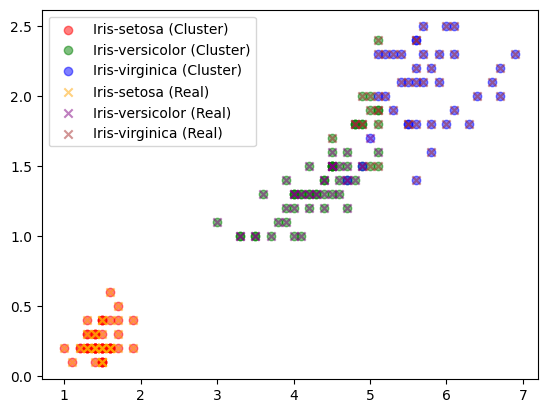

In [33]:
#Para 3 clusters
kmeanclust = KMeans(n_clusters=3, random_state=0, n_init="auto")
clusters = kmeanclust.fit_predict(X)
print (clusters)
print (y)
clusters = np.choose(clusters, [1, 0, 2]).astype(int)
print (clusters)
datasetcl3 = dataset.copy()
datasetcl3["Cluster"] = clusters
print(kmeanclust.inertia_)

dataframecluster0 = datasetcl3[datasetcl3.Cluster == 0]
dataframecluster1 = datasetcl3[datasetcl3.Cluster == 1]
dataframecluster2 = datasetcl3[datasetcl3.Cluster == 2]

dataframeflower0 = datasetcl3[datasetcl3.Flower == 0]
dataframeflower1 = datasetcl3[datasetcl3.Flower == 1]
dataframeflower2 = datasetcl3[datasetcl3.Flower == 2]

plt.scatter(dataframecluster0.Petal_Length, dataframecluster0.Petal_Width, color = "red", label = "Iris-setosa (Cluster)" , marker= "o", alpha= 0.5)
plt.scatter(dataframecluster1.Petal_Length, dataframecluster1.Petal_Width, color = "green", label = "Iris-versicolor (Cluster)", marker= "o", alpha= 0.5)
plt.scatter(dataframecluster2.Petal_Length, dataframecluster2.Petal_Width, color = "blue", label = "Iris-virginica (Cluster)", marker= "o", alpha= 0.5)
plt.scatter(dataframeflower0.Petal_Length, dataframeflower0.Petal_Width, color = "orange", label = "Iris-setosa (Real)", marker = "x" , alpha= 0.5)
plt.scatter(dataframeflower1.Petal_Length, dataframeflower1.Petal_Width, color = "purple", label = "Iris-versicolor (Real)" , marker = "x" , alpha= 0.5)
plt.scatter(dataframeflower2.Petal_Length, dataframeflower2.Petal_Width, color = "brown", label = "Iris-virginica (Real)", marker = "x" , alpha= 0.5)
plt.legend()
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 3
 2 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 2 3 2 2 2 2 1 2 2 2 3
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 3
 2 3]
57.31787321428571


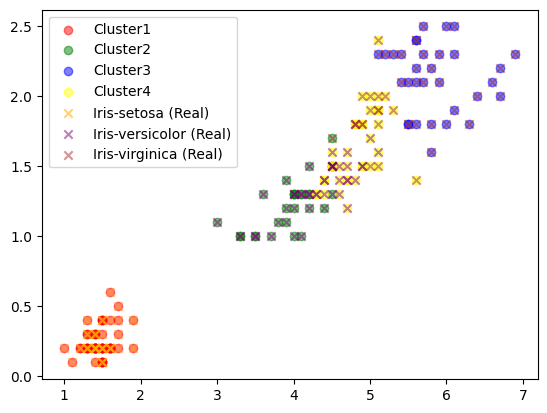

In [34]:
#Para 4 clusters
kmeanclust = KMeans(n_clusters=4, random_state=0, n_init="auto")
clusters = kmeanclust.fit_predict(X)
print(clusters)
print(y)
clusters = np.choose(clusters, [1, 0, 2, 3]).astype(int)
print(clusters)
datasetcl4 = dataset.copy()
datasetcl4["Cluster"] = clusters
print(kmeanclust.inertia_)

dataframecluster0 = datasetcl4[datasetcl4.Cluster == 0]
dataframecluster1 = datasetcl4[datasetcl4.Cluster == 1]
dataframecluster2 = datasetcl4[datasetcl4.Cluster == 2]
dataframecluster3 = datasetcl4[datasetcl4.Cluster == 3]

dataframeflower0 = datasetcl4[datasetcl4.Flower == 0]
dataframeflower1 = datasetcl4[datasetcl4.Flower == 1]
dataframeflower2 = datasetcl4[datasetcl4.Flower == 2]

plt.scatter(dataframecluster0.Petal_Length, dataframecluster0.Petal_Width, color = "red", label = "Cluster1" , marker= "o", alpha= 0.5)
plt.scatter(dataframecluster1.Petal_Length, dataframecluster1.Petal_Width, color = "green", label = "Cluster2", marker= "o", alpha= 0.5)
plt.scatter(dataframecluster2.Petal_Length, dataframecluster2.Petal_Width, color = "blue", label = "Cluster3", marker= "o", alpha= 0.5)
plt.scatter(dataframecluster3.Petal_Length, dataframecluster3.Petal_Width, color = "yellow", label = "Cluster4", marker= "o", alpha= 0.5)

plt.scatter(dataframeflower0.Petal_Length, dataframeflower0.Petal_Width, color = "orange", label = "Iris-setosa (Real)", marker = "x" , alpha= 0.5)
plt.scatter(dataframeflower1.Petal_Length, dataframeflower1.Petal_Width, color = "purple", label = "Iris-versicolor (Real)" , marker = "x" , alpha= 0.5)
plt.scatter(dataframeflower2.Petal_Length, dataframeflower2.Petal_Width, color = "brown", label = "Iris-virginica (Real)", marker = "x" , alpha= 0.5)
plt.legend()
plt.show()

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k